## Import
Import **numpy**, **pandas** and **matplotlib**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mord as m

from sklearn.linear_model import LinearRegression

pd.options.mode.chained_assignment = None

## Google Play Store Dataset
For this case study, the dataset chosen by the researchers is called `Google Play Store Apps` dataset. This dataset contains 10841 rows which represents transactions by customers shopping for groceries. The dataset contains 13 unique columns.

The dataset is provided as `googleplaystore.csv`. Therefore, we must read the file.

In [2]:
apps_df = pd.read_csv('googleplaystore.csv')
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Data Cleaning and Pre-processing

For data cleaning in this dataset, the researchers decided with these modifications.
1. Remove `Last Updated`, `Current Ver`, `Android Ver`
2. Include Main `Genres` Only
3. Include Main `Content Rating` Only
4. Numerical data for `Installs`, `Size`, `Price`
5. Binning `Rating`, `Reviews`, `Size`
6. Remove/Modify NaN and duplicate observations

### Removing `Last Updated`, `Current Ver`, `Android Ver`

In this case study, the columns `Last Updated`, `Current Ver`, and `Android Ver` are not needed and will be removed

In [3]:
apps_df = apps_df.drop(["Last Updated", "Current Ver", "Android Ver"], axis=1)
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


### Including Main Genre Only in `Genres`

The researchers noticed the presence of too much unique values for `Genres` due to a lot of apps having combined genres. The unique values can be seen below.

In [4]:
apps_df['Genres'].nunique(), apps_df['Genres'].unique()

(120,
 array(['Art & Design', 'Art & Design;Pretend Play',
        'Art & Design;Creativity', 'Art & Design;Action & Adventure',
        'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
        'Comics', 'Comics;Creativity', 'Communication', 'Dating',
        'Education;Education', 'Education', 'Education;Creativity',
        'Education;Music & Video', 'Education;Action & Adventure',
        'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
        'Entertainment;Music & Video', 'Entertainment;Brain Games',
        'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
        'Health & Fitness', 'House & Home', 'Libraries & Demo',
        'Lifestyle', 'Lifestyle;Pretend Play',
        'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
        'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
        'Music', 'Word', 'Racing', 'Casual;Creativity',
        'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
  

To solve this problem, the researches decided to include only the main genres provided in `Genres`. This is to divide the apps into simpler genres and allow easier visualization of categories for this column.

The first genre which comes before the character `;` for multi-genre apps will be considered the main genre. Genres that come after will be removed via string manipulation.

In [5]:
apps_df["Genres"] = apps_df["Genres"].str.split(";", 1).str[0]
apps_df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino',
       'February 11, 2018'], dtype=object)

It is seen that the `Genres` section contained a bizarre genre of 'February 11, 2018', so the researchers decided to see the values of these apps.

In [6]:
apps_df[apps_df["Genres"] == "February 11, 2018"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


The researchers have chosen to drop this since it only contains one observation in the dataset. 

In [7]:
apps_df = apps_df[apps_df['Genres'] != "February 11, 2018"]
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


### Including Main `Content Rating` Only

It is seen below that the `Content Rating` values contained some with 'Everyone' and 'Everyone 10+'. The researchers decided to exclude the age rating and only include the main content rating as well. In this case, the ratings would be 'Everyone', 'Teen', 'Mature', 'Adults', and 'Unrated'.

In [8]:
apps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Simply splitting the strings by the whitespaces and including the first substring will divide the content ratings into its desirable categories.

In [9]:
apps_df["Content Rating"] = apps_df["Content Rating"].str.split(" ", 1).str[0]
apps_df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Mature', 'Adults', 'Unrated'], dtype=object)

### Assigning Numerical Data for `Installs`

Looking at the `Installs` column below, it can be noticed that the data type for the values are not yet initialized as float. Therefore, the researchers will also use string manipulation for this column for conversion to float.

In [10]:
apps_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

First, remove the '+' and ',' symbols to allow it for conversion.

In [11]:
apps_df['Installs'] = apps_df['Installs'].str.replace("+", "")
apps_df['Installs'] = apps_df['Installs'].str.replace(",", "")
apps_df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

Next, it is possible to convert them into float using the pandas `to_numeric()` function.

In [12]:
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], downcast="float")
apps_df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00], dtype=float32)

### Assigning Numerical Data for `Size`

The same can be said for the `Size` column below. Therefore, the researchers will also use string manipulation for this column for conversion to float.

In [13]:
apps_df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

By replacing 'k' into 'e+3' and 'M' into 'e+6', it converts the values into a string that makes the `to_numeric()` function possible. However it is noticed that there is a value named 'Varies with device'. The researchers decided to convert that into NaN and deal with the NaN values in a later step.

In [14]:
apps_df["Size"] = apps_df["Size"].str.replace('k', 'e+3')
apps_df["Size"] = apps_df["Size"].str.replace('M', 'e+6')
apps_df["Size"] = apps_df["Size"].replace('Varies with device', np.nan)
apps_df["Size"].unique()

array(['19e+6', '14e+6', '8.7e+6', '25e+6', '2.8e+6', '5.6e+6', '29e+6',
       '33e+6', '3.1e+6', '28e+6', '12e+6', '20e+6', '21e+6', '37e+6',
       '2.7e+6', '5.5e+6', '17e+6', '39e+6', '31e+6', '4.2e+6', '7.0e+6',
       '23e+6', '6.0e+6', '6.1e+6', '4.6e+6', '9.2e+6', '5.2e+6', '11e+6',
       '24e+6', nan, '9.4e+6', '15e+6', '10e+6', '1.2e+6', '26e+6',
       '8.0e+6', '7.9e+6', '56e+6', '57e+6', '35e+6', '54e+6', '201e+3',
       '3.6e+6', '5.7e+6', '8.6e+6', '2.4e+6', '27e+6', '2.5e+6', '16e+6',
       '3.4e+6', '8.9e+6', '3.9e+6', '2.9e+6', '38e+6', '32e+6', '5.4e+6',
       '18e+6', '1.1e+6', '2.2e+6', '4.5e+6', '9.8e+6', '52e+6', '9.0e+6',
       '6.7e+6', '30e+6', '2.6e+6', '7.1e+6', '3.7e+6', '22e+6', '7.4e+6',
       '6.4e+6', '3.2e+6', '8.2e+6', '9.9e+6', '4.9e+6', '9.5e+6',
       '5.0e+6', '5.9e+6', '13e+6', '73e+6', '6.8e+6', '3.5e+6', '4.0e+6',
       '2.3e+6', '7.2e+6', '2.1e+6', '42e+6', '7.3e+6', '9.1e+6', '55e+6',
       '23e+3', '6.5e+6', '1.5e+6', '7.5e+6', '51

After this, implementing the function will now be possible.

In [15]:
apps_df["Size"] = pd.to_numeric(apps_df["Size"], downcast="float")
apps_df["Size"].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 7.00e+06, 2.30e+07, 6.00e+06, 6.10e+06,
       4.60e+06, 9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07,      nan,
       9.40e+06, 1.50e+07, 1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06,
       7.90e+06, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05,
       3.60e+06, 5.70e+06, 8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+07, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+07, 7.30e+06, 9.10e+06, 5.50e

### Assigning Numerical Data for `Price`

The same can also be said for the `Size` column below. Therefore, the researchers will also use string manipulation for this column for conversion to float.

In [16]:
apps_df['Price'] = apps_df['Price'].str.replace("$", "")
apps_df["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

After this, using the `to_numeric()` function will now be possible.

In [17]:
apps_df['Price'] = pd.to_numeric(apps_df["Price"], downcast="float")
apps_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04], dtype=float32)

### Dealing with NaN and duplicate values

By checking the null values below, the `Rating` and `Size` column will undergo preprocessing.

In [18]:
apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64

The observation where `Type` is null is dropped from the dataset.

In [19]:
apps_df[apps_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0.0,NaN,0.0,Everyone,Strategy


In [20]:
apps_df = apps_df[apps_df["Type"].notnull()]
apps_df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

For `Rating` and `Size`, the researchers used the average of the apps per `Genres`. The researchers decided to use this column instead of `Category` because the latter has fewer unique values than the other, making the former more specific to the apps' capabilities.

In [21]:
apps_df.groupby("Genres").mean()

,Rating,Size,Installs,Price
Genres,,,,
Action,4.286667,50575344.0,2.468602e+07,0.241440
Adventure,4.219101,40134116.0,1.464775e+07,0.734615
Arcade,4.308072,41984836.0,4.554152e+07,0.281688
Art & Design,4.349231,12492308.0,1.825190e+06,0.086522
Auto & Vehicles,4.190411,20037146.0,6.250613e+05,0.158471
Beauty,4.278571,13795745.0,5.131519e+05,0.000000
Board,4.300000,24589678.0,2.873244e+06,0.872063
Books & Reference,4.344444,13701160.0,8.211456e+06,0.541667
Business,4.121452,14472162.0,2.178076e+06,0.402761


After checking the means for `Rating` and `Size` to be appropriate, an `apply()` function was done along with a lambda function that aims to assign the NaN values with the mean of those groups.

In [22]:
apps_df['Rating'] = apps_df.groupby(['Genres'], sort=False)['Rating'].apply(lambda x: x.fillna(x.mean()))
apps_df['Rating'].unique()

array([4.1       , 3.9       , 4.7       , 4.5       , 4.3       ,
       4.4       , 3.8       , 4.2       , 4.6       , 3.2       ,
       4.        , 4.34923077, 4.8       , 4.9       , 3.6       ,
       3.7       , 4.27857143, 3.3       , 4.34444444, 3.4       ,
       3.5       , 3.1       , 4.12145215, 4.15517241, 5.        ,
       2.6       , 3.97076923, 3.        , 1.9       , 2.5       ,
       2.8       , 2.7       , 1.        , 2.9       , 4.31243339,
       4.43555556, 4.16697248, 4.19736842, 4.17846154, 4.18914286,
       2.3       , 4.04741144, 4.3       , 4.06319018, 4.33598726,
       2.2       , 4.19824561, 1.7       , 2.        , 4.19211356,
       1.8       , 4.25559846, 4.30807175, 4.2379822 , 4.15866261,
       4.25416667, 4.03928571, 4.21139601, 4.10970874, 2.4       ,
       4.10138648, 4.19041096, 4.13188854, 4.09555556, 1.6       ,
       4.10929204, 4.25966387, 4.27725753, 4.244     , 4.17216981,
       4.1851145 , 4.13218884, 4.0516129 , 4.28666667, 4.10208

In [23]:
apps_df['Size'] = apps_df.groupby(['Genres'], sort=False)['Size'].apply(lambda x: x.fillna(x.mean()))
apps_df['Size'].unique()

array([1.9000000e+07, 1.4000000e+07, 8.7000000e+06, 2.5000000e+07,
       2.8000000e+06, 5.6000000e+06, 2.9000000e+07, 3.3000000e+07,
       3.1000000e+06, 2.8000000e+07, 1.2000000e+07, 2.0000000e+07,
       2.1000000e+07, 3.7000000e+07, 2.7000000e+06, 5.5000000e+06,
       1.7000000e+07, 3.9000000e+07, 3.1000000e+07, 4.2000000e+06,
       7.0000000e+06, 2.3000000e+07, 6.0000000e+06, 6.1000000e+06,
       4.6000000e+06, 9.2000000e+06, 5.2000000e+06, 1.1000000e+07,
       2.4000000e+07, 1.2492308e+07, 9.4000000e+06, 1.5000000e+07,
       1.0000000e+07, 1.2000000e+06, 2.6000000e+07, 8.0000000e+06,
       7.9000000e+06, 5.6000000e+07, 5.7000000e+07, 2.0037150e+07,
       3.5000000e+07, 5.4000000e+07, 2.0100000e+05, 3.6000000e+06,
       5.7000000e+06, 8.6000000e+06, 2.4000000e+06, 2.7000000e+07,
       2.5000000e+06, 1.6000000e+07, 3.4000000e+06, 8.9000000e+06,
       3.9000000e+06, 2.9000000e+06, 3.8000000e+07, 3.2000000e+07,
       5.4000000e+06, 1.8000000e+07, 1.1000000e+06, 2.2000000e

For duplicated rows, the researchers decided to simply drop these observations.

In [24]:
apps_df.duplicated().sum()

485

In [25]:
apps_df = apps_df.drop_duplicates()
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53000000.0,5000.0,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3600000.0,100.0,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.189143,3,9500000.0,1000.0,Free,0.0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,13701158.0,1000.0,Free,0.0,Mature,Books & Reference


### Dropping Impossible Data

### Binning `Rating`, `Reviews`, `Size` into Appropriate Quantiles

In the case of `Rating`, the researchers needed a new column that divides the rating into categories, which will be mainly used for association rules. The new column will then be called `Binned Rating`. For this binning process. the researches decided to use the `cut()` function since it is better to divide it into bins separating the ratings based on the actual value itself.

In [26]:
apps_df[apps_df["Rating"] < 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


The bins were finalized as 0-1, 1-2, 2-3, 3-4, and 4-5 inclusive. It is applicable since there is no rating that is below 1, above 5, nor is there an actual rating of 0.

In [27]:
bins = [0, 1, 2, 3, 4, 5]

The new `Binned Rating` column is then integrated into the dataset.

In [28]:
apps_df["Binned Rating"] = pd.cut(apps_df['Rating'], bins)
apps_df["Binned Rating"]

0        (4, 5]
1        (3, 4]
2        (4, 5]
3        (4, 5]
4        (4, 5]
          ...  
10836    (4, 5]
10837    (4, 5]
10838    (4, 5]
10839    (4, 5]
10840    (4, 5]
Name: Binned Rating, Length: 10354, dtype: category
Categories (5, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5]]

However, for `Reviews` and `Size`, the researchers decided that it was appropriate to divide the reviews into quantiles so that the binning process can be more normalized in concern with the dataset present. They will be named `Binned Reviews` and `Binned Size` respectively.

The researchers chose 5 as the number of quantiles to divide them accordingly into 5 categories: very small, small, average, large, and very large. `Reviews` will be converted to float also in case of statistical computations.

In [29]:
apps_df["Reviews"] = pd.to_numeric(apps_df["Reviews"], downcast='float')
apps_df['Binned Reviews'] = pd.qcut(apps_df['Reviews'], 5, labels=['very small', 'small', 'average', 'large', 'very large'])
apps_df['Binned Reviews'].unique()

[small, average, very large, large, very small]
Categories (5, object): [very small < small < average < large < very large]

In [30]:
apps_df['Binned Size'] = pd.qcut(apps_df['Size'], 5, labels=['very small', 'small', 'average', 'large', 'very large'])
apps_df['Binned Size'].unique()

[large, average, small, very small, very large]
Categories (5, object): [very small < small < average < large < very large]

In [31]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Binned Rating,Binned Reviews,Binned Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"(4, 5]",small,large
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design,"(3, 4]",average,average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"(4, 5]",very large,small
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"(4, 5]",very large,large
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design,"(4, 5]",average,very small
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53000000.0,5000.0,Free,0.0,Everyone,Education,"(4, 5]",small,very large
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3600000.0,100.0,Free,0.0,Everyone,Education,"(4, 5]",very small,very small
10838,Parkinson Exercices FR,MEDICAL,4.189143,3.0,9500000.0,1000.0,Free,0.0,Everyone,Medical,"(4, 5]",very small,small
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,13701158.0,1000.0,Free,0.0,Mature,Books & Reference,"(4, 5]",small,average


## Relevance of `rating` in user interest

In [32]:
linreg_df = apps_df[['Rating', 'Installs']]
linreg_df

,Rating,Installs
0,4.100000,10000.0
1,3.900000,500000.0
2,4.700000,5000000.0
3,4.500000,50000000.0
4,4.300000,100000.0
...,...,...
10836,4.500000,5000.0
10837,5.000000,100.0
10838,4.189143,1000.0
10839,4.500000,1000.0


In [33]:
linreg_df.isnull().values.any()

False

In [34]:
# removing apps with 0 installs
linreg_df[linreg_df['Installs'] < 1]

,Rating,Installs
4465,4.335987,0.0
5307,4.255598,0.0
5486,4.312433,0.0
5945,4.312433,0.0
6692,4.211396,0.0
7434,4.255598,0.0
8081,4.121452,0.0
8614,4.132189,0.0
8871,4.349231,0.0
9337,4.109292,0.0


In [35]:
linreg_df = linreg_df[linreg_df['Installs'] >= 1]
linreg_df[linreg_df['Installs'] < 1]

,Rating,Installs


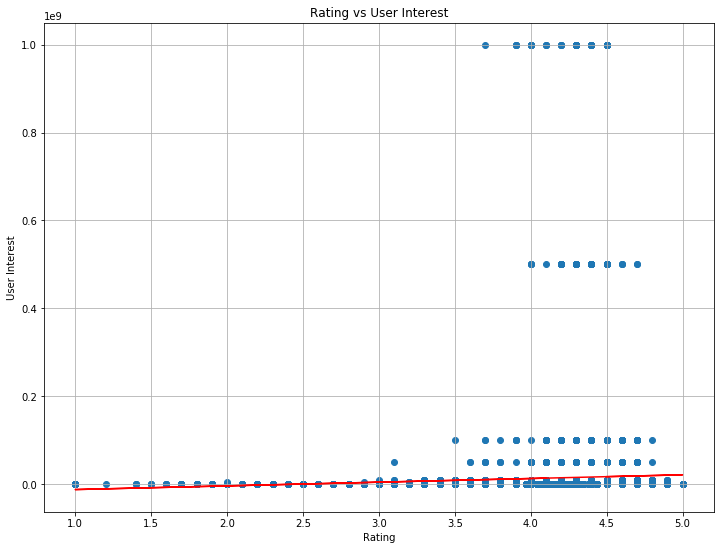

In [36]:
x = linreg_df.iloc[:, 0].values.reshape(-1, 1)
y = linreg_df.iloc[:, 1].values.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(x, y)
y_pred = linreg.predict(x)

plt.figure(figsize=(12, 9))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title("Rating vs User Interest")
plt.xlabel("Rating")
plt.ylabel("User Interest")
plt.grid(True)
plt.show()

In [37]:
install_vals = linreg_df['Installs'].unique()
install_vals.sort()
install_vals

array([1.e+00, 5.e+00, 1.e+01, 5.e+01, 1.e+02, 5.e+02, 1.e+03, 5.e+03,
       1.e+04, 5.e+04, 1.e+05, 5.e+05, 1.e+06, 5.e+06, 1.e+07, 5.e+07,
       1.e+08, 5.e+08, 1.e+09], dtype=float32)

In [38]:
np.random.seed(1)

def getInstallSampleVal (base):
    if (base == 1000000000):
        return 1000000000
    
    base_index = np.where(install_vals == base)[0][0]
    min_val = install_vals[base_index]
    max_val = install_vals[base_index + 1]
    
    return float(np.random.randint(min_val, max_val))

In [39]:
sample_vals = []

for val in linreg_df['Installs']:
    sample_vals.append(getInstallSampleVal(val))

linreg_df['Installs_sample'] = sample_vals
linreg_df

,Rating,Installs,Installs_sample
0,4.100000,10000.0,43003.0
1,3.900000,500000.0,970924.0
2,4.700000,5000000.0,8937352.0
3,4.500000,50000000.0,50491263.0
4,4.300000,100000.0,412201.0
...,...,...,...
10836,4.500000,5000.0,6007.0
10837,5.000000,100.0,289.0
10838,4.189143,1000.0,4693.0
10839,4.500000,1000.0,2047.0


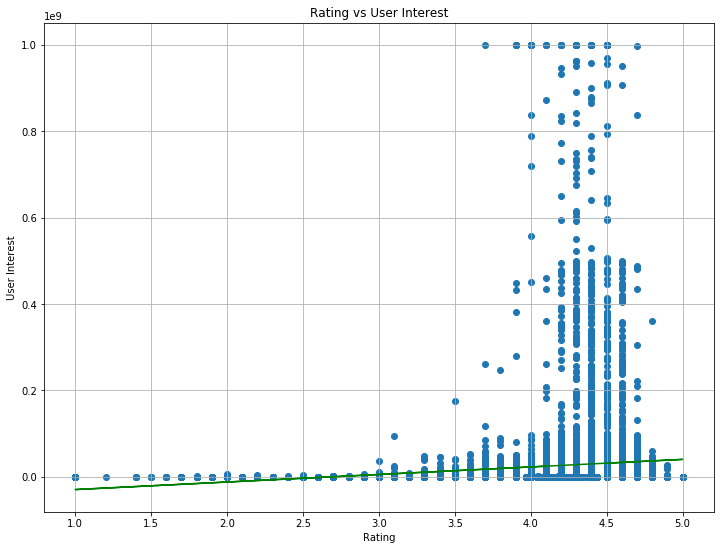

In [40]:
x_s = linreg_df.iloc[:, 0].values.reshape(-1, 1)
y_s = linreg_df.iloc[:, 2].values.reshape(-1, 1)

linreg_s = LinearRegression()
linreg_s.fit(x_s, y_s)
y_s_pred = linreg_s.predict(x_s)

plt.figure(figsize=(12, 9))
plt.scatter(x_s, y_s)
plt.plot(x_s, y_s_pred, color='green')
plt.title("Rating vs User Interest")
plt.xlabel("Rating")
plt.ylabel("User Interest")
plt.grid(True)
plt.show()